# Applying the XGBoost Algorithm

So far you've learned to apply a variety of different models. In this notebook you should prepare the data, import the XGBClassifier, train it and make predictions on your own. (Feel free to tune the hyperparameters in the end using a grid or random search!). 

We'll use the pima-native-americans-diabetic dataset for this task. You can find it in the data folder. You will see that the dataset is lacking column names. Therefore we added them as a list in one of the cells below. Have a look at the documentation. It is possible to import the data and directly add the columns names (they are in the correct order). 

If you need help or inspiration you can have a look at this [blogpost](https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/), describing how to use the XGBoost Algorithm. 

## Import and Setup

In [160]:
# Import moduls (as many as you need)
from xgboost import XGBClassifier
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from itertools import product

import matplotlib.pyplot as plt


RSEED=42

In [161]:
# Import data 
df = pd.read_csv('data/pima-native-americans-diabetes.csv', header=None)
df.head(2)

column_names = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age', 'outcome']

In [162]:
df.columns = column_names

df.head(10)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [163]:
# Define features and target and split into train and test 
y = df['outcome']
X = df.drop(columns = ['outcome'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=RSEED)

y_train.shape, y_test.shape

((576,), (192,))

In [164]:
# Fit model to training data
model = XGBClassifier()

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7447916666666666

In [166]:
#Function to produce a row with regular intervals
def make_row(row_length,row_min,row_max,):
    step = (row_max - row_min)/row_length
    row = []
    for i in range(0,row_length+1):
#        print(df._STATE.min()+(step*i))
        row.append(row_min+(step*i))

    return row

In [167]:
#Produce a grid. 
grid = pd.DataFrame()

for i in X_train.columns:
    row_min = X_train[i].min()
    row_max = X_train[i].max()
    row = make_row(3,row_min,row_max) #Selecting a high value here will result in long waiting time in the next step
    grid[i] = row

grid

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.084000,21.0
1,5.666667,66.333333,40.666667,33.0,248.0,22.366667,0.832333,41.0
2,11.333333,132.666667,81.333333,66.0,496.0,44.733333,1.580667,61.0
3,17.000000,199.000000,122.000000,99.0,744.0,67.100000,2.329000,81.0


In [168]:
#Create permutations of all possible values

def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())

dictionary = {}
for i in grid.columns:
    dictionary.update({i : grid[i]})

full_grid = expand_grid(dictionary)

full_grid

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.084000,21.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.084000,41.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.084000,61.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.084000,81.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.832333,21.0
...,...,...,...,...,...,...,...,...
65531,17.0,199.0,122.0,99.0,744.0,67.1,1.580667,81.0
65532,17.0,199.0,122.0,99.0,744.0,67.1,2.329000,21.0
65533,17.0,199.0,122.0,99.0,744.0,67.1,2.329000,41.0
65534,17.0,199.0,122.0,99.0,744.0,67.1,2.329000,61.0


In [169]:
#predict the full grid using the model
prob = model.predict_proba(full_grid)

#extract positive predictions and assign them to a column in full_grid
full_grid['prob'] = prob[:,1]

In [170]:
full_grid.tail(100)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,prob
65436,17.0,199.0,122.0,99.0,496.0,22.366667,2.329000,21.0,0.521948
65437,17.0,199.0,122.0,99.0,496.0,22.366667,2.329000,41.0,0.904136
65438,17.0,199.0,122.0,99.0,496.0,22.366667,2.329000,61.0,0.377561
65439,17.0,199.0,122.0,99.0,496.0,22.366667,2.329000,81.0,0.311081
65440,17.0,199.0,122.0,99.0,496.0,44.733333,0.084000,21.0,0.976114
...,...,...,...,...,...,...,...,...,...
65531,17.0,199.0,122.0,99.0,744.0,67.100000,1.580667,81.0,0.570617
65532,17.0,199.0,122.0,99.0,744.0,67.100000,2.329000,21.0,0.754542
65533,17.0,199.0,122.0,99.0,744.0,67.100000,2.329000,41.0,0.784742
65534,17.0,199.0,122.0,99.0,744.0,67.100000,2.329000,61.0,0.612902


In [171]:
#save the grid to a csv file - be ware of exceptionally large csv files
full_grid.to_csv('data/full_grid.csv')

In [172]:
#extract the most important features from the model
imp = list(zip(model.feature_names_in_,model.feature_importances_))
imp.sort(key = lambda tuple:tuple[1],reverse= True)
imp[0:2]

[('glucose', 0.25932443), ('bmi', 0.13654964)]

In [173]:
#We can visualise a maximum of 3 variables, so lets group by the 2 most important variables and compute the mean
grid_slice = full_grid.groupby(['glucose','bmi'],as_index=False).mean()

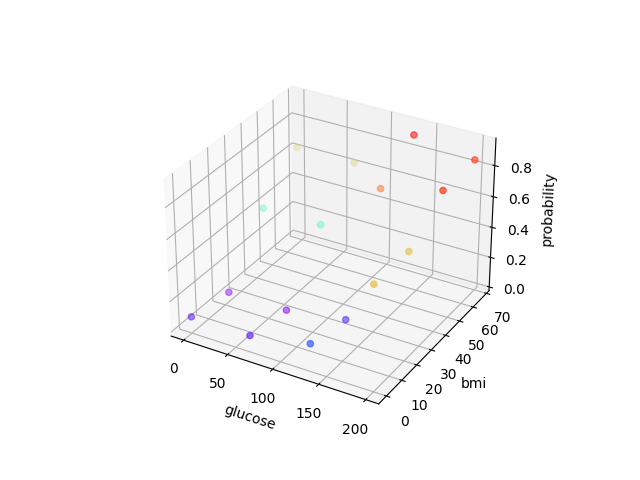

In [174]:
#create a 3D visualisation of the resulting probability vs 2 most important prediction variables plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

xs = grid_slice.glucose
ys = grid_slice.bmi
zs = grid_slice.prob
ax.scatter3D(xs, ys, zs, marker='o', c = zs, cmap = 'rainbow')

ax.set_xlabel('glucose')
ax.set_ylabel('bmi')
ax.set_zlabel('probability')

plt.show()
